## 개요 

# 공공데이터 상권정보 분석해 보기

* '소상공인시장진흥공단_상가(상권)정보'를 활용한 간단한 분석<br>
[공공데이터포털 소상공인시장진흥공단_상가(상권)정보](https://www.data.go.kr/dataset/15012005/fileData.do)

* 실습 기록용으로 남깁니다.

## 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import koreanize_matplotlib
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('medical_201909.csv', encoding="cp949", low_memory=False)

### folium 시각화 연습

In [11]:
import folium
from folium.plugins import MarkerCluster

# 데이터 추출
df_elder = df[df['상권업종소분류명'] == '노인/치매병원'].copy()

# folium 지도 생성 (fit_bounds에 위도/경도를 넣어 적정 zoom 상태로 시작)
latitude = df_elder['위도']
longitude = df_elder['경도']
main_folium_map = folium.Map(location=[latitude.mean(),longitude.mean()])
main_folium_map.fit_bounds([[latitude.min(), longitude.min()],[latitude.max(),longitude.max()]])

# 시/도별 색상을 다르게 하기위해 색상표 추가 (별도 확인한 folium색상리스트와 데이터의 시도명 활용)
index_color= ['red', 'blue', 'green', 'purple', 'orange', 'darkred',
         'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue',
         'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen',
         'gray', 'lightgray']
index_address = df_elder['시도명'].value_counts().index.tolist()
color_table = {}

for i, area in enumerate(index_address):
  color_table[area] = index_color[i]

# 위도/경도 기준으로 지도에 마커 추가

# 상호명은 아이콘 위에 마우스 올리면 보이게 함 (tooltip)
# 주소는 클릭하면 조이게 하고, 세로로 뜨지않게 Popup(address, max_width=200) 을 활용
# 시도별 색상부여를 위해 위에서 만든 색상표 사용, 시도명 null값은 딕셔터리.get(,'black)으로 처리
# 요양병원에 맞는 아이콘 부여 (prefix='fa', icon='blind') prefix fa에 참고한 사이트 : https://glyphsearch.com/
# MarkerCluster를 활용해 클러스터화(묶음) 수행
cluster = MarkerCluster()
for idx in df_elder.index:
  location = [df_elder.loc[idx, '위도'], df_elder.loc[idx, '경도']]
  name = df_elder.loc[idx, '상호명']
  address = df_elder.loc[idx, '도로명주소']
  icon_color = color_table.get(df_elder.loc[idx, '시도명'],'black')

  cluster.add_child(
      folium.Marker(location,
                    popup=folium.Popup(address, max_width=200),
                    tooltip=name,
                    icon=folium.Icon(color=icon_color, prefix='fa', icon='blind')
                    )
  ).add_to(main_folium_map)

main_folium_map

* 썸네일용 이미지 업로드<br>
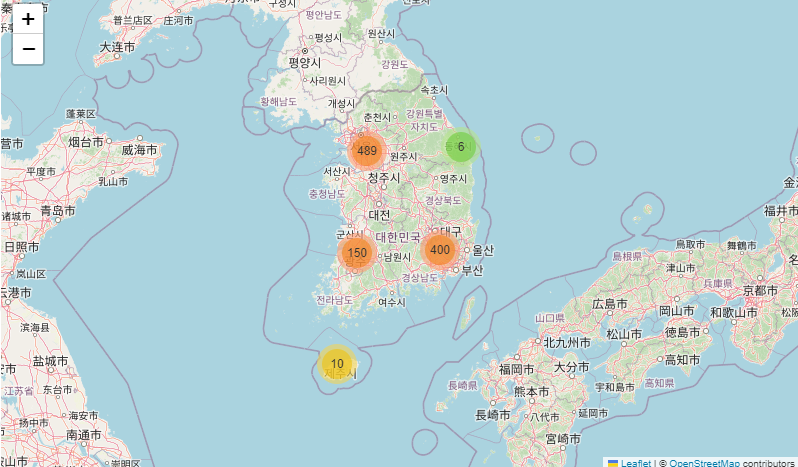